In [ ]:
#File activits 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
#Carregar dataset
df = pd.read_csv('breast.csv')

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [16]:
#df.info()

In [ ]:
#Linea a): Histogramas

#Escolher duas classes
classes = ['car', 'fad']
df_classes = df[df['Class'].isin(classes)]
#df_classes

In [20]:
#Lista de features
features = ['I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA',	'Max.IP', 'DR',	'P']

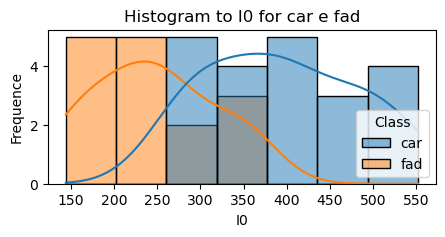

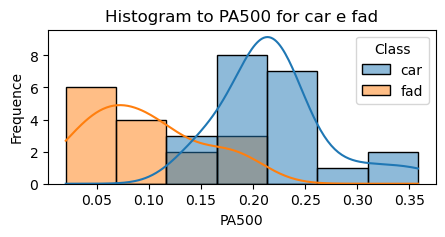

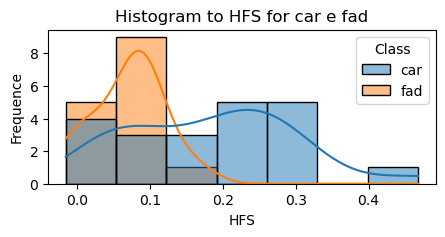

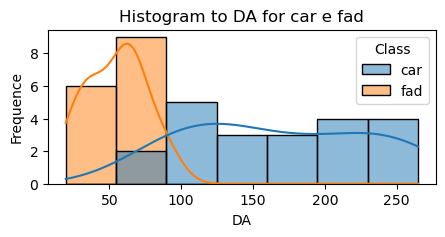

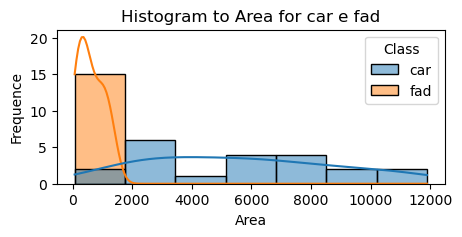

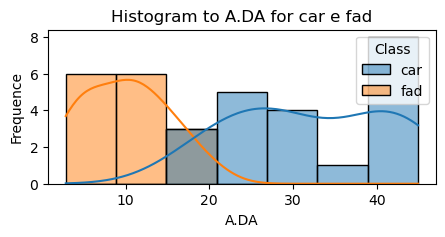

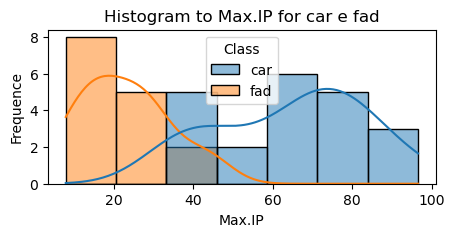

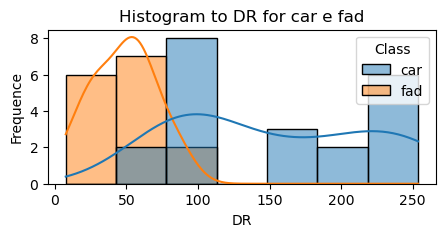

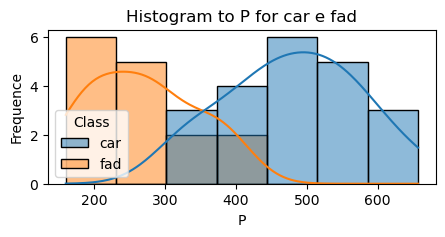

In [50]:
#Criando histogramas sobrepostos para cadada feature
for feature in features:
    plt.figure(figsize=(5, 2))
    sns.histplot(df_classes, x=feature, hue='Class', kde= True)
    #Information to appear in interface histogram:
    plt.title(f'Histogram to {feature} for {classes[0]} e {classes[1]}')
    plt.xlabel(feature)
    plt.ylabel('Frequence')
    #plt.legend(title='Class')
    plt.show()

In [53]:
#Linea b): Matriz de Correlacao e Scatter Plots

#Calcular a matriz de Correlacao
corr_matrix = df[features].corr()
#corr_matrix

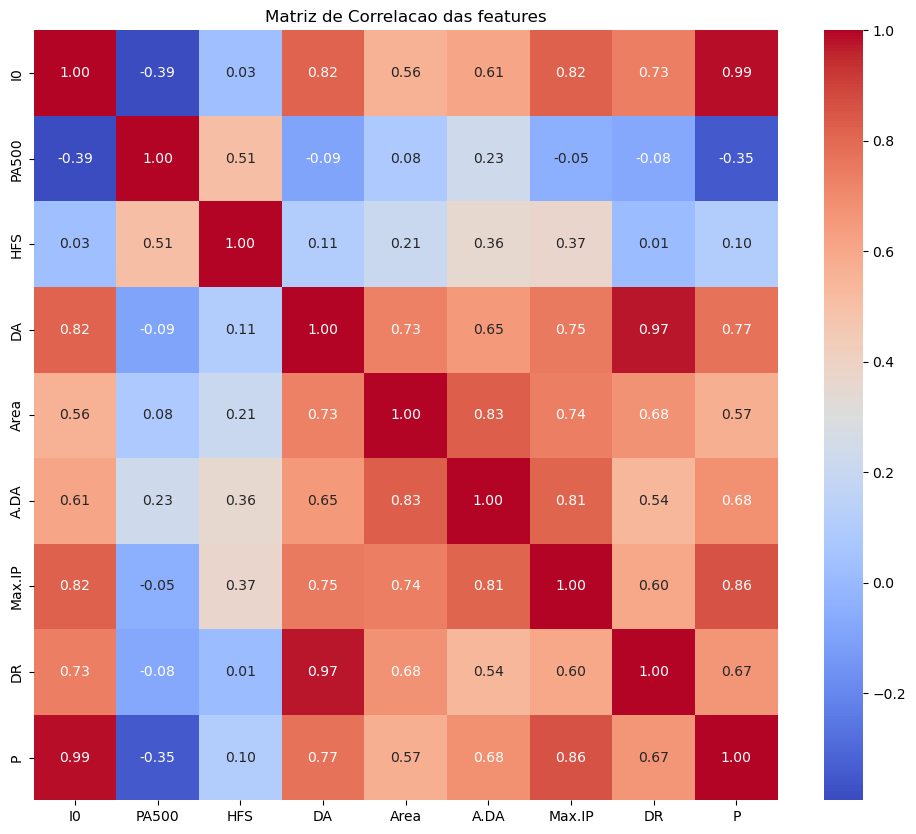

In [55]:
#Visualizar a matriz de correlacao com im heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacao das features')
plt.show()

In [59]:
#Identificar as features mais e menos correlacionadas
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

In [61]:
#Features mais correlacionadas (excluindo a correlacao de uma feature com ela mesma)
strongest_corr = sorted_pairs [len(features):].tail(1)
print("Features mais correcionas:\n", strongest_corr)

Features mais correcionas:
 P  P    1.0
dtype: float64


In [62]:
#Features menos correlacionadas
weakest_corr = sorted_pairs[:1]
print("Features mais correlacionadas: \n", weakest_corr)

Features mais correlacionadas: 
 I0  PA500   -0.393647
dtype: float64


In [ ]:
#Criar scatter plots para os casos de maior e menor correlacao
